In [23]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.losses import BinaryCrossentropy

In [24]:
#importing dataset
df=pd.read_csv('/content/framingham.csv')
df['TenYearCHD'].value_counts()

,count
TenYearCHD,
0,3594
1,644


In [25]:
#correlation
corr=df.corr()


<Axes: >

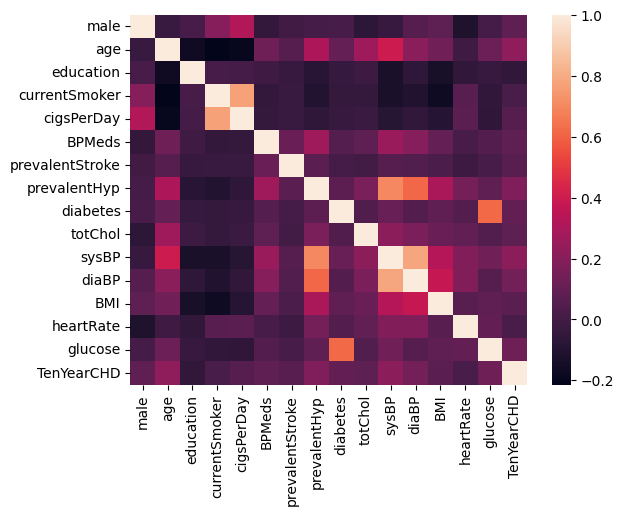

In [26]:
#visualize the correlation using heatmap
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)


In [27]:
x=df.drop(columns=['TenYearCHD'])
y=df['TenYearCHD']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [30]:
# Build the model
model = keras.Sequential([
    layers.Dense(40, activation='relu', input_shape=(15,)),
    layers.Dense(20,activation="relu"),
    layers.Dense(15,activation="relu"),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
#Compile the model
model.compile(optimizer='adam', loss=BinaryCrossentropy(), metrics=['accuracy'])

In [32]:
#Train the model
model.fit(x_train_scaled, y_train, epochs=100, validation_data=(x_test_scaled, y_test), verbose= 0)

In [33]:
#prediction
y_pred = (model.predict(x_test_scaled) > 0.5).astype('int32')


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [34]:
#find accuracy value
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')


Model Accuracy: 85.38%
